<a href="https://colab.research.google.com/github/ActiveStacks/DatasetOne/blob/main/Final1_EXPERIMENT_CODEBERTLLM_1E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
#path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [174]:
df = pd.read_csv(path1)

In [175]:

from sklearn.model_selection import train_test_split

In [176]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [177]:
df.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
10,10,file,INFO,Hardcoded HTTP url found,*,CWE-312,Cleartext Storage of Sensitive Information,1,*
39,39,webview,WARNING,Javascript enabled in Webview,binding.onlineScriptingWeb.getSettings().setJa...,CWE-939,Improper Authorization in Handler for Custom U...,1,binding.onlineScriptingWeb.getSettings().setJa...
199,199,file,WARNING,Logging found,"Log.d(TAG, String.format(""Name not found: %s"",...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, String.format(""user_str"", e.getMess..."
201,201,file,INFO,Hardcoded HTTP url found,/**,CWE-312,Cleartext Storage of Sensitive Information,1,//user_comment
269,269,file,WARNING,Logging found,"Log.d(TAG, ""Failed to parse color"", e);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, ""user_str"", e);"
...,...,...,...,...,...,...,...,...,...
595036,618347,webview,WARNING,Javascript enabled in Webview,browserWebview.getSettings().setJavaScriptEnab...,CWE-939,Improper Authorization in Handler for Custom U...,1,browserWebview.getSettings().setJavaScriptEnab...
595058,618371,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
595059,618372,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
595060,618373,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"


In [178]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [179]:
df.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
595057,618370,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,0,browserWebview.getSettings().setJavaScriptEnab...
595058,618371,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
595059,618372,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
595060,618373,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"
595061,618374,file,WARNING,Logging found,"Log.w(TAG, ""Native exit reason="" + reason);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + reason);"


In [180]:
df.shape

(595062, 9)

In [181]:
df.describe()

,index,Vulnerability_status
count,595062.000000,595062.000000
mean,303371.376094,0.009654
std,178515.056302,0.097782
min,0.000000,0.000000
25%,148765.250000,0.000000
50%,297530.500000,0.000000
75%,458728.750000,0.000000
max,618374.000000,1.000000


In [182]:
df.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [183]:
df.nunique()

,0
index,595062
category,4
Severity,3
Description,20
Code,590130
CWE_ID,13
CWE_Desc,13
Vulnerability_status,2
processed_code,589728


In [184]:
df['Vulnerability_status'].unique()

array([0, 1])

In [185]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    589317
1      5745
Name: count, dtype: int64


In [186]:
df_safe = df[df['Vulnerability_status']==0]

In [187]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [188]:
df_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [189]:
df_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
595053,618366,NaN,NaN,NaN,String dns_message_encoded = Base64.encodeToSt...,NaN,NaN,0,String dns_message_encoded = Base64.encodeToSt...
595054,618367,NaN,NaN,NaN,if(doh_server_url.substring(doh_server_url.len...,NaN,NaN,0,if(doh_server_url.substring(doh_server_url.len...
595055,618368,NaN,NaN,NaN,if(record.getName().equals(Name.fromString(hos...,NaN,NaN,0,if(record.getName().equals(Name.fromString(hos...
595056,618369,NaN,NaN,NaN,response = record.rdataToString();,NaN,NaN,0,response = record.rdataToString();
595057,618370,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,0,browserWebview.getSettings().setJavaScriptEnab...


In [190]:
df_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
10,10,file,INFO,Hardcoded HTTP url found,*,CWE-312,Cleartext Storage of Sensitive Information,1,*
39,39,webview,WARNING,Javascript enabled in Webview,binding.onlineScriptingWeb.getSettings().setJa...,CWE-939,Improper Authorization in Handler for Custom U...,1,binding.onlineScriptingWeb.getSettings().setJa...
199,199,file,WARNING,Logging found,"Log.d(TAG, String.format(""Name not found: %s"",...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, String.format(""user_str"", e.getMess..."
201,201,file,INFO,Hardcoded HTTP url found,/**,CWE-312,Cleartext Storage of Sensitive Information,1,//user_comment
269,269,file,WARNING,Logging found,"Log.d(TAG, ""Failed to parse color"", e);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, ""user_str"", e);"


In [191]:
df_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
595036,618347,webview,WARNING,Javascript enabled in Webview,browserWebview.getSettings().setJavaScriptEnab...,CWE-939,Improper Authorization in Handler for Custom U...,1,browserWebview.getSettings().setJavaScriptEnab...
595058,618371,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
595059,618372,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
595060,618373,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"
595061,618374,file,WARNING,Logging found,"Log.w(TAG, ""Native exit reason="" + reason);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + reason);"


In [192]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [193]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [194]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [195]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [196]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    5745
1    5745
Name: count, dtype: int64


In [197]:
print(df_balanced.value_counts())

index   category  Severity  Description                    Code                                                                                                           CWE_ID   CWE_Desc                                                 Vulnerability_status  processed_code                                                                                                   
618374  file      WARNING   Logging found                  Log.w(TAG, "Native exit reason=" + reason);                                                                    CWE-532  Insertion of Sensitive Information into Log File         1                     Log.w(TAG, "user_str" + reason);                                                                                     1
10      file      INFO      Hardcoded HTTP url found       *                                                                                                              CWE-312  Cleartext Storage of Sensitive Information               1              

<Axes: >

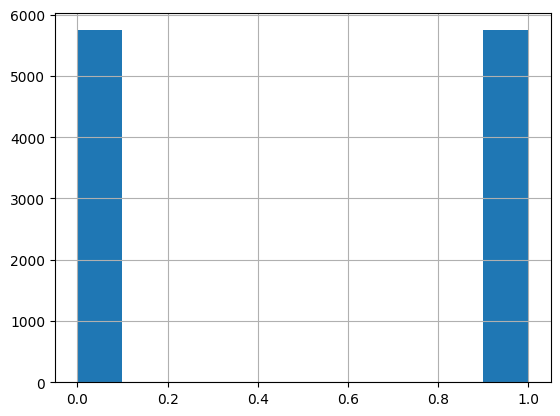

In [198]:
df_balanced['Vulnerability_status'].hist()

In [199]:
df_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,276847,NaN,NaN,NaN,if (setByTheUser) {,NaN,NaN,0,if (setByTheUser) {
1,206121,NaN,NaN,NaN,* Creates a new FrameBodyTRSO datatype.,NaN,NaN,0,* Creates a new FrameBodyTRSO datatype.
2,543336,file,WARNING,Logging found,"if (BuildConfig.DEBUG) Log.w(TAG + id, ""Intent...",CWE-532,Insertion of Sensitive Information into Log File,1,"if (BuildConfig.DEBUG) Log.w(TAG + id, ""user_s..."
3,612620,file,WARNING,Logging found,"Log.i(TAG, ""Start "" + TAG);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + TAG);"
4,565980,NaN,NaN,NaN,return (ConnectivityManager) appContext.getSys...,NaN,NaN,0,return (ConnectivityManager) appContext.getSys...


In [200]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [201]:
df_balanced.head(10)

,index,category,Vulnerability_status,processed_code
0,276847,NaN,0,if (setByTheUser) {
1,206121,NaN,0,* Creates a new FrameBodyTRSO datatype.
2,543336,file,1,"if (BuildConfig.DEBUG) Log.w(TAG + id, ""user_s..."
3,612620,file,1,"Log.i(TAG, ""user_str"" + TAG);"
4,565980,NaN,0,return (ConnectivityManager) appContext.getSys...
5,61653,NaN,0,import androidx.preference.*;
6,604341,file,1,"Log.d(""user_str"", ""user_str""+ _subfolder + ""us..."
7,551278,file,1,private static final String MEDIA_STIGMA_URL =...
8,23696,file,1,"Log.d(""user_str"", ""user_str"" + e.getMessage());"
9,280672,file,1,"serializer.setOutput(out, StandardCharsets.UTF..."


In [202]:
df_balanced.tail(10)

,index,category,Vulnerability_status,processed_code
11480,605130,NaN,0,boolean mDisposed = false;
11481,12162,NaN,0,private boolean onRenameDirQueston(final Selec...
11482,282861,NaN,0,titleBuilder.setEndIcon(R.drawable.ic_trash_ca...
11483,36699,file,1,"Log.e(TAG, e.getMessage(),e);"
11484,196235,NaN,0,public void onNoiseServicePercentChange(int pe...
11485,603807,file,1,"Log.d(TAG, ""user_str""+html);"
11486,323547,NaN,0,* Gets dialog type (Light/Dark) from current t...
11487,498206,NaN,0,final Transaction transaction = getItem(index);
11488,531904,NaN,0,if (BurstCounter.getBurstCount() > BurstCount...
11489,179749,file,1,"Log.e(TAG, ""user_str"" + loyaltyCardId);"


In [203]:
df_balanced.dropna()

,index,category,Vulnerability_status,processed_code
2,543336,file,1,"if (BuildConfig.DEBUG) Log.w(TAG + id, ""user_s..."
3,612620,file,1,"Log.i(TAG, ""user_str"" + TAG);"
6,604341,file,1,"Log.d(""user_str"", ""user_str""+ _subfolder + ""us..."
7,551278,file,1,private static final String MEDIA_STIGMA_URL =...
8,23696,file,1,"Log.d(""user_str"", ""user_str"" + e.getMessage());"
...,...,...,...,...
11478,595082,file,1,"Log.d(""user_str"", ""user_str"" + newText);"
11479,605559,file,1,"Log.d(LOG_TAG, ""user_str""+savedAuthuser+""user_..."
11483,36699,file,1,"Log.e(TAG, e.getMessage(),e);"
11485,603807,file,1,"Log.d(TAG, ""user_str""+html);"


In [204]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [205]:
df_balanced.head()

,processed_code,Vulnerability_status
0,if (setByTheUser) {,0
1,* Creates a new FrameBodyTRSO datatype.,0
2,"if (BuildConfig.DEBUG) Log.w(TAG + id, ""user_s...",1
3,"Log.i(TAG, ""user_str"" + TAG);",1
4,return (ConnectivityManager) appContext.getSys...,0


In [206]:
df_balanced.columns = ['text', 'labels']

In [207]:
df_balanced.head(5)

,text,labels
0,if (setByTheUser) {,0
1,* Creates a new FrameBodyTRSO datatype.,0
2,"if (BuildConfig.DEBUG) Log.w(TAG + id, ""user_s...",1
3,"Log.i(TAG, ""user_str"" + TAG);",1
4,return (ConnectivityManager) appContext.getSys...,0


In [208]:
df_balanced.head(5)

,text,labels
0,if (setByTheUser) {,0
1,* Creates a new FrameBodyTRSO datatype.,0
2,"if (BuildConfig.DEBUG) Log.w(TAG + id, ""user_s...",1
3,"Log.i(TAG, ""user_str"" + TAG);",1
4,return (ConnectivityManager) appContext.getSys...,0


In [209]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [210]:
!pip install datasets

In [211]:
from datasets import load_dataset, DatasetDict

In [212]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [213]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 11490
    })
})

In [214]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [215]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [216]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 6894
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 2298
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 2298
    })
})

In [217]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [218]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [219]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [220]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/6894 [00:00<?, ? examples/s]

Map:   0%|          | 0/2298 [00:00<?, ? examples/s]

Map:   0%|          | 0/2298 [00:00<?, ? examples/s]

In [221]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [222]:
!pip install torchinfo

In [223]:
from torchinfo import summary

In [224]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [225]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [226]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [227]:
!pip install evaluate

In [228]:
import evaluate

In [229]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [230]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-230-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [231]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,0.175298,{'accuracy': 0.9564838990426457},{'recall': 0.9444941808415398},{'precision': 0.9652333028362305},{'f1': 0.9547511312217195}
2,0.222700,0.158523,{'accuracy': 0.9595300261096605},{'recall': 0.964189794091316},{'precision': 0.9530973451327434},{'f1': 0.9586114819759679}
3,0.126800,0.172528,{'accuracy': 0.963881636205396},{'recall': 0.964189794091316},{'precision': 0.9616071428571429},{'f1': 0.9628967367009388}
4,0.078000,0.201001,{'accuracy': 0.9586597040905135},{'recall': 0.9677708146821844},{'precision': 0.9482456140350877},{'f1': 0.9579087284005317}


Trainer is attempting to log a value of "{'accuracy': 0.9564838990426457}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9444941808415398}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9652333028362305}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9547511312217195}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9595300261096605}" of type <class 

TrainOutput(global_step=1724, training_loss=0.13035402331164153, metrics={'train_runtime': 632.6789, 'train_samples_per_second': 43.586, 'train_steps_per_second': 2.725, 'total_flos': 7255550462607360.0, 'train_loss': 0.13035402331164153, 'epoch': 4.0})

In [232]:
outcome= trainer.predict(tokenized_datasets['test'])

In [233]:
print(outcome.metrics)

{'test_loss': 0.23851197957992554, 'test_accuracy': {'accuracy': 0.9495213228894691}, 'test_recall': {'recall': 0.9580838323353293}, 'test_precision': {'precision': 0.9435551811288964}, 'test_f1': {'f1': 0.9507640067911715}, 'test_runtime': 15.4865, 'test_samples_per_second': 148.387, 'test_steps_per_second': 2.325}
